In [1]:
import math
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as pchs
from matplotlib.patches import Patch
import numpy as np
import os
import scipy
from scipy import stats
import seaborn as sb

In [2]:
def openFiles(path):
    
    times = []
    spinLs = []
    stubLs = []
    gapLs = []
    angles = []
    spinIsLs = []
    spinIsLsG = []
    spinIs = []
    spinIsG = []
    normIs = []
    normIsG = []
    
    for files in os.scandir(path):
        
        data = open(files, 'r')
        blanks = 0
        fTimes = []
        fSpinLs = []
        fStubLs = [[],[]]
        fGapLs = []
        fAngles = [[],[]]
        fSpinIsLs = []
        fSpinIsLsG = []
        fSpinIs = []
        fSpinIsG = []
        fNormIs = []
        fNormIsG = []
        
        for line in data.readlines():
            
            iData = line.split()
            valueWorks = True
            
            if len(iData)>1:
                newLine = line.translate(line.maketrans('','',r'[,]'))
                iData = newLine.split()
            
            try:
                float(iData[0])
            except:
                valueWorks = False
            
            if valueWorks == True:
                
                if blanks == 1:
                    fTimes.append(float(iData[0])/60)
                
                elif blanks == 2:
                    fSpinLs.append(float(iData[0]))
                
                elif blanks == 3:
                    fStubLs[0].append(float(iData[0]))
                    fStubLs[1].append(float(iData[1]))
                
                elif blanks == 4:
                    fGapLs.append(float(iData[0]))
                
                elif blanks == 5:
                    fAngles[0].append(float(iData[0]))
                    fAngles[1].append(float(iData[1]))
                
                elif blanks == 6:
                    frameSpinIsLs = []
                    for j in range(len(iData)):
                        frameSpinIsLs.append(float(iData[j]))
                    fSpinIsLs.append(frameSpinIsLs)
                
                elif blanks == 7:
                    frameSpinIsLsG = []
                    for j in range(len(iData)):
                        frameSpinIsLsG.append(float(iData[j]))
                    fSpinIsLsG.append(frameSpinIsLsG)
                
                elif blanks == 8:
                    frameSpinIs = []
                    for j in range(len(iData)):
                        frameSpinIs.append(float(iData[j]))
                    fSpinIs.append(frameSpinIs)
                
                elif blanks == 9:
                    frameSpinIsG = []
                    for j in range(len(iData)):
                        frameSpinIsG.append(float(iData[j]))
                    fSpinIsG.append(frameSpinIsG)
                
                elif blanks == 10:
                    frameNormIs = []
                    for j in range(len(iData)):
                        frameNormIs.append(float(iData[j]))
                    fNormIs.append(frameNormIs)
                
                elif blanks == 11:
                    frameNormIsG = []
                    for j in range(len(iData)):
                        frameNormIsG.append(float(iData[j]))
                    fNormIsG.append(frameNormIsG)
            
            else:
                blanks += 1
        
        times.append(fTimes)
        spinLs.append(fSpinLs)
        stubLs.append(fStubLs)
        gapLs.append(fGapLs)
        angles.append(fAngles[0])
        angles.append(fAngles[1])
        spinIsLs.append(fSpinIsLs)
        spinIsLsG.append(fSpinIsLsG)
        spinIs.append(fSpinIs)
        spinIsG.append(fSpinIsG)
        normIs.append(fNormIs)
        normIsG.append(fNormIsG)
    
    return(times, spinLs, stubLs, gapLs, angles, spinIsLs, spinIsLsG, spinIs, spinIsG, normIs, normIsG)




def removeData(times, data, removeList):
    
    newTs = []
    newData = []
    
    for i in range(len(times)):
        if i not in removeList:
            newTs.append(times[i])
            newData.append(data[i])
    
    return(newTs, newData)




def comboRemove(times, spinLs, angles, removeLs, removeAs):
    
    timesRS = []
    spinLsRS = []
    anglesRS = []
    
    timesC = []
    spinLsC = []
    for i in range(len(times)):
        timesC.append(times[i])
        timesC.append(times[i])
        spinLsC.append(spinLs[i])
        spinLsC.append(spinLs[i])
    
    removeC = []
    for i in range(len(removeLs)):
        removeC.append(removeLs[i])
        removeC.append(removeLs[i]+1)
    
    for i in range(len(removeAs)):
        if removeAs[i] not in removeC:
            index = 0
            if removeAs[i] > removeC[len(removeC)-1]:
                removeC.insert(len(removeC), removeAs[i])
            else:
                while removeAs[i] > removeC[index]:
                    index += 1
                removeC.insert(index, removeAs[i])
    
    for i in range(len(timesC)):
        if i not in removeC:
            timesRS.append(timesC[i])
            spinLsRS.append(spinLsC[i])
            anglesRS.append(angles[i])
    
    return(timesRS, spinLsRS, anglesRS)




def combineData(times, data):
    
    allData = []
    
    for i in range(len(data)):
        dataI = data[i]
        for j in range(len(dataI)):
            allData.append(dataI[j])
    
    return(allData)




def equalFRs(times, data, frameRate, threshold):
    
    timesFR = []
    dataFR = []
    
    for i in range(len(times)):
        
        timesI = times[i]
        dataI = data[i]
        
        if abs(timesI[1]-timesI[0]-frameRate) < threshold:
            timesFR.append(timesI)
            dataFR.append(dataI)
        
        else:
            
            timesFRi = []
            dataFRi = []
            dataTot = []
            maxTi = round(timesI[len(timesI)-1]/frameRate)+1
            
            for j in range(maxTi):
                timesFRi.append(j*frameRate)
                dataTot.append([])
            
            for j in range(len(timesI)):
                if timesI[1]-timesI[0]>frameRate and abs(abs(timesI[j]/frameRate-int(timesI[j]/frameRate))-0.5)<0.1:
                    dataTot[int(timesI[j]/frameRate)].append(dataI[j])
                    if int(timesI[j]/frameRate)+1 < len(dataTot):
                        dataTot[int(timesI[j]/frameRate)+1].append(dataI[j])
                else:
                    dataTot[round(timesI[j]/frameRate)].append(dataI[j])
            
            for j in range(maxTi):
                dataFRi.append(np.mean(dataTot[j]))
            
            timesFR.append(timesFRi)
            dataFR.append(dataFRi)
    
    return(timesFR, dataFR)




def smoothen(times, dists, order):
    
    orders = []
    longOrder = 0
    
    for i in range(len(times)):
        orders.append(int(round(math.sqrt(order)/(times[i][1]-times[i][0]))))
    
    for i in range(len(orders)):
        if orders[i]>longOrder:
            longOrder = orders[i]
    
    smoothDists = []
    smooths = []
    counter = 0
    
    for i in range(len(dists)):
        
        smoothDists.append([])
        smooths.append([])
        
        for j in range(len(dists[i])):
            
            smoothDists[i].append(dists[i][j])
    
    while counter<longOrder:
        
        for i in range(len(smoothDists)):
            
            if counter<orders[i]:
                
                smooths.append([])
                
                smoothL0 = (20*smoothDists[i][0] + 15*smoothDists[i][1] + 6*smoothDists[i][2] + smoothDists[i][3])/42
                smoothL1 = (15*smoothDists[i][0] + 20*smoothDists[i][1] + 15*smoothDists[i][2] + 6*smoothDists[i][3] + smoothDists[i][4])/57
                smoothL2 = (6*smoothDists[i][0] + 15*smoothDists[i][1] + 20*smoothDists[i][2] + 15*smoothDists[i][3] + 6*smoothDists[i][4] + smoothDists[i][5])/63
                
                smooths[i].append(smoothL0)
                smooths[i].append(smoothL1)
                smooths[i].append(smoothL2)
                
                for j in range(3,len(smoothDists[i])-3):
                    smoothLI = (smoothDists[i][j-3] + 6*smoothDists[i][j-2] + 15*smoothDists[i][j-1] + 20*smoothDists[i][j] + 15*smoothDists[i][j+1] + 6*smoothDists[i][j+2] + smoothDists[i][j+3])/64
                    smooths[i].append(smoothLI)
                
                smoothLM2 = (smoothDists[i][len(dists[i])-6] + 6*smoothDists[i][len(dists[i])-5] + 15*smoothDists[i][len(dists[i])-4] + 20*smoothDists[i][len(dists[i])-3] + 15*smoothDists[i][len(dists[i])-2] + 6*smoothDists[i][len(dists[i])-1])/63
                smoothLM1 = (smoothDists[i][len(dists[i])-5] + 6*smoothDists[i][len(dists[i])-4] + 15*smoothDists[i][len(dists[i])-3] + 20*smoothDists[i][len(dists[i])-2] + 15*smoothDists[i][len(dists[i])-1])/57
                smoothLM0 = (smoothDists[i][len(dists[i])-4] + 6*smoothDists[i][len(dists[i])-3] + 15*smoothDists[i][len(dists[i])-2] + 20*smoothDists[i][len(dists[i])-1])/42
                
                smooths[i].append(smoothLM2)
                smooths[i].append(smoothLM1)
                smooths[i].append(smoothLM0)
            
            else:
                smooths.append([])
                for j in range(len(smoothDists[i])):
                    smooths[i].append(smoothDists[i][j])
            
            smoothDists[i].clear()
            
            for j in range(len(smooths[i])):
                smoothDists[i].append(smooths[i][j])
        
        smooths.clear()
        counter += 1
        
    return(smoothDists)




def states(statesR, statesS):
    
    rNoNorm = statesR[0]/np.sum(statesR)
    rYesNorm = statesR[1]/np.sum(statesR)
    rXNorm = statesR[2]/np.sum(statesR)
    sNoNorm = statesS[0]/np.sum(statesS)
    sYesNorm = statesS[1]/np.sum(statesS)
    sLow = (statesS[1]-math.sqrt(statesS[1]))/np.sum(statesS)
    sHigh = (statesS[1]+math.sqrt(statesS[1]))/np.sum(statesS)
    
    return(rNoNorm, rYesNorm, rXNorm, sNoNorm, sYesNorm, sLow, sHigh)




def dMax(times, dists):
    
    maxTimes = []
    maxDists = []
    
    for i in range(len(times)):
        
        maxTimeI = 0
        maxDistsI = 0
        
        for j in range(len(times[i])):
            if dists[i][j]>maxDistsI:
                maxTimeI = times[i][j]
                maxDistsI = dists[i][j]
        
        maxTimes.append(maxTimeI)
        maxDists.append(maxDistsI)
    
    return(maxTimes, maxDists)




def swarm(namesIn, dataIn):
    
    names = []
    data = []
    
    for i in range(len(dataIn)):
        namesI = namesIn[i]
        dataI = dataIn[i]
        for j in range(len(dataI)):
            names.append(namesI)
            data.append(dataI[j])
    
    return(names, data)




def boxes(names, data):
    
    types = []
    std = []
    error = []
    
    for i in range(len(data)):
        dataI = data[i]
        types.append(names[i])
        std.append([np.mean(dataI), np.mean(dataI)-2*np.std(dataI), np.mean(dataI)+2*np.std(dataI)])
        error.append([np.mean(dataI), np.mean(dataI)-2*np.std(dataI)/np.sqrt(len(dataI)), np.mean(dataI)+2*np.std(dataI)/np.sqrt(len(dataI))])
    
    return(types, std, error)




def lengthSwarm(spinLs, maxAs):
    
    names = []
    lenN = []
    lenY = []
    
    for i in range(len(maxAs)):
        if maxAs[i] < 15:
            names.append('Does Not Splay')
            lenN.append(spinLs[i])
        else:
            names.append('Splays')
            lenY.append(spinLs[i])
    
    types = ['Does Not Splay', 'Splays']
    std = [[np.mean(lenN), np.mean(lenN)-2*np.std(lenN), np.mean(lenN)+2*np.std(lenN)],
           [np.mean(lenY), np.mean(lenY)-2*np.std(lenY), np.mean(lenY)+2*np.std(lenY)]]
    error = [[np.mean(lenN), np.mean(lenN)-2*np.std(lenN)/np.sqrt(len(lenN)), np.mean(lenN)+2*np.std(lenN)/np.sqrt(len(lenN))],
             [np.mean(lenY), np.mean(lenY)-2*np.std(lenY)/np.sqrt(len(lenY)), np.mean(lenY)+2*np.std(lenY)/np.sqrt(len(lenY))]]
    
    return(names, lenN, lenY, types, std, error)




def dCKD(dists):
    
    dCKDs = []
    
    for i in range(len(dists)):
        dCKDsI = []
        for j in range(len(dists[i])):
            dCKDsI.append(dists[i][j]-dists[i][0])
        dCKDs.append(dCKDsI)
    
    return(dCKDs)




def velocities(times, spinLs, angles):
    
    vs = []
    maxVTs = []
    maxVs = []
    vsN = []
    vsY = []
    
    for i in range(len(times)):
        
        vsI = []
        maxTI = 0
        maxVI = 0
        timesI = times[i]
        spinLsI = spinLs[i]
        anglesI = angles[i]
        
        for j in range(len(timesI)):
            
            if j==0:
                Vij = -(spinLsI[1]-spinLsI[0])/(timesI[1]-timesI[0])
            elif j==len(timesI)-1:
                Vij = -(spinLsI[j]-spinLsI[j-1])/(timesI[j]-timesI[j-1])
            else:
                Vij = -(spinLsI[j+1]-spinLsI[j-1])/(timesI[j+1]-timesI[j-1])
            
            if Vij>maxVI:
                maxTI = timesI[j]
                maxVI = Vij
            
            vsI.append(Vij)
            
            if anglesI[j]<15:
                vsN.append(Vij)
            else:
                vsY.append(Vij)
        
        vs.append(vsI)
        maxVTs.append(maxTI)
        maxVs.append(maxVI)
    
    weightsN = []
    weightsY = []
    for i in range(len(vsN)):
        weightsN.append(1/len(vsN))
    for i in range(len(vsY)):
        weightsY.append(1/len(vsY))
    
    tV, pV = scipy.stats.ttest_ind(vsN, vsY)
    
    return(vs, maxVTs, maxVs, vsN, vsY, pV, weightsN, weightsY)




def velHist(times, spinLs, angles):
    
    timesN = []
    spinLsN = []
    timesY = []
    spinLsY = []
    
    for i in range(len(times)):
        
        timesI = times[i]
        spinLsI = spinLs[i]
        anglesI = angles[i]
        
        for j in range(len(timesI)):
            
            if anglesI[j]<15:
                timesN.append(timesI[j])
                spinLsN.append(spinLsI[j])
            
            else:
                timesY.append(timesI[j])
                spinLsY.append(spinLsI[j])
    
    vsN, maxVTsN, maxVsN = velocities(timesN, spinLsN)
    vsY, maxVTsY, maxVsY = velocities(timesY, spinLsY)
    
    tVs, pVs = scipy.stats.ttest_ind(vsN, vsY)
    tMaxVTs, pMaxVTs = scipy.stats.ttest_ind(maxVTsN, maxVTsY)
    tMaxVs, pMaxVs = scipy.stats.ttest_ind(maxVsN, maxVsY)
    
    return(vsN, maxVTsN, maxVsN, vsY, maxVTsY, maxVsY, pV, pMaxVT, pMaxV)




def timeData(times, data, T):
    
    tTimes = []
    avgDs = []
    lowDs = []
    highDs = []
    
    tData = []
    tDs = []
    maxT = 0
    
    for i in range(len(times)):
        tDs.append([])
        if times[i][len(times[i])-1] > maxT:
            maxT = times[i][len(times[i])-1]
    
    maxI = int(round(60*maxT/3.5))
    
    for i in range(maxI+1):
        tTimes.append(3.5*i/60)
        tData.append([])
        count = 0
        for j in range(len(times)):
            tDs[j].append([])
            if times[j][len(times[j])-1] >= 3.5*i:
                count += 1
    
    for i in range(len(times)):
        for j in range(len(times[i])):
            time = int(round(60*times[i][j]/3.5))
            tDs[i][time].append(data[i][j])
    
    for i in range(len(tDs)):
        for j in range(len(tDs[i])):
            if len(tDs[i][j]) > 0:
                tData[j].append(np.mean(tDs[i][j]))
    
    for i in range(len(tData)):
        
        if len(tData[i]) == 0:
            if i == 0:
                tData[i].append(np.mean(tData[i+1]))
            elif i == len(tData)-1:
                tData[i].append(np.mean(tData[i-1]))
            else:
                tData[i].append((np.mean(tData[i-1])+np.mean(tData[i+1]))/2)
        
        avgDataI = np.mean(tData[i])
        eData = np.std(tData[i])/math.sqrt(len(tData[i]))
        avgDs.append(avgDataI)
        lowDs.append(avgDataI-eData)
        highDs.append(avgDataI+eData)
    
    return(tTimes, avgDs, lowDs, highDs)




def integrateAng(times, data):
    
    ints = []
    avgInts = []
    lowInts = []
    highInts = []
    
    for i in range(len(times)):
        
        timesI = times[i]
        dataI = data[i]
        intsI = []
        
        for j in range(len(timesI)):
            intsI.append(np.sum(dataI[j])*(timesI[1]-timesI[0]))
        
        ints.append(intsI)
        avgI = np.mean(intsI)
        avgInts.append(np.mean(intsI))
        eInts = np.std(intsI)/math.sqrt(len(intsI))
        lowInts.append(avgI-eInts)
        highInts.append(avgI+eInts)
    
    return(ints, avgInts, lowInts, highInts)




def integrateAT(times, data, T):
    
    avgTs = []
    ints = []
    intsT = []
    avgInts = []
    lowInts = []
    highInts = []
    T=T/60
    
    longT = 0
    for i in range(len(times)):
        maxTi = int(round(times[i][len(times[i])-1]/T))
        if maxTi > longT:
            longT = maxTi
    
    for i in range(longT):
        avgTs.append(T*i)
        intsT.append([])
    
    for i in range(len(times)):
        
        timesI = times[i]
        dataI = data[i]
        dataCollect = [[]]*int(round(timesI[len(timesI)-1]/T)+1)
        intsI = []
        intI = 0
        
        for j in range(len(timesI)):
            dataCollect[int(round(timesI[j]/T))].append(dataI[j])
        
        for j in range(longT):
            if j < len(dataCollect):
                if len(dataCollect[j]) > 0:
                    intI += np.mean(dataCollect[j])
            intsI.append(intI/60)
            intsT[j].append(intI/60)
        
        ints.append(intsI)
    
    for i in range(longT):
        avgI = np.mean(intsT[i])
        eI = np.std(intsT[i])/math.sqrt(len(intsT[i]))
        avgInts.append(avgI)
        lowInts.append(avgI-eI)
        highInts.append(avgI+eI)
    
    return(avgTs, ints, avgInts, lowInts, highInts)




def avgNormIs(normIs, normIsG):
    
    avgNIs = []
    minNIs = []
    maxNIs = []
    avgNIsG = []
    minNIsG = []
    maxNIsG = []
    
    for i in range(len(normIs)):
        
        avgNIsI = []
        minNIsI = []
        maxNIsI = []
        avgNIsIg = []
        minNIsIg = []
        maxNIsIg = []
        
        normIsI = normIs[i]
        normIsIg = normIsG[i]
        
        for j in range(len(normIsI)):
            avgNIsI.append(np.mean(normIsI[j]))
            minNIsI.append(np.amin(normIsI[j]))
            maxNIsI.append(np.amax(normIsI[j]))
            avgNIsIg.append(np.mean(normIsIg[j]))
            minNIsIg.append(np.amin(normIsIg[j]))
            maxNIsIg.append(np.amax(normIsIg[j]))
        
        avgNIs.append(avgNIsI)
        minNIs.append(minNIsI)
        maxNIs.append(maxNIsI)
        avgNIsG.append(avgNIsIg)
        minNIsG.append(minNIsIg)
        maxNIsG.append(maxNIsIg)
    
    return(avgNIs, minNIs, maxNIs, avgNIsG, minNIsG, maxNIsG)




def runFolder(folder, statesR, statesS, removeLs, removeGs, removeAs, removeIs, frameRate):
    
    rNoNorm, rYesNorm, rXNorm, sNoNorm, sYesNorm, sLow, sHigh = states(statesR, statesS)
    
    times, spinLs, stubLs, gapLs, angles, spinIsLs, spinIsLsG, spinIs, spinIsG, normIs, normIsG = openFiles(path=folder)
    
    timesL, spinLsNew = removeData(times, spinLs, removeLs)
    dLs = dCKD(spinLsNew)
    maxDLts, maxDLs = dMax(timesL, dLs)
    tTimesL, tLs, tLowLs, tHighLs = timeData(timesL, dLs, frameRate)
    
    timesG, gapLs = removeData(times, gapLs, removeGs)
    dGs = dCKD(gapLs)
    maxGts, maxGs = dMax(timesG, gapLs)
    tTimesG, tGs, tLowGs, tHigGLs = timeData(timesG, gapLs, frameRate)
    
    timesAng = []
    for i in range(len(times)):
        timesAng.append(times[i])
        timesAng.append(times[i])
    timesA, anglesNew = removeData(timesAng, angles, removeAs)
    maxAts, maxAs = dMax(timesA, anglesNew)
    tTimesA, tAs, tLowAs, tHighAs = timeData(timesA, anglesNew, frameRate)
    aInts, aAvgInts, aLowInts, aHighInts = integrateAng(timesA, anglesNew)
    tAvgTimesA, tInts, tAvgInts, tLowInts, tHighInts = integrateAT(timesA, anglesNew, frameRate)
    
    timesRS, spinLsRS, anglesRS = comboRemove(times, spinLs, angles, removeLs, removeAs)
    maxLtsRS, maxLsRS = dMax(timesRS, spinLsRS)
    maxAtsRS, maxAsRS = dMax(timesRS, anglesRS)
    iSpinLsRS = []
    for i in range(len(spinLsRS)):
        iSpinLsRS.append(spinLsRS[i][0])
    vs, maxVTs, maxVs, vsN, vsY, pV, weightsN, weightsY = velocities(timesRS, spinLsRS, anglesRS)
    
    timesI, normIs = removeData(times, normIs, removeIs)
    timesIg, normIsG = removeData(times, normIsG, removeIs)
    avgNIs, minNIs, maxNIs, avgNIsG, minNIsG, maxNIsG = avgNormIs(normIs, normIsG)
    tTimesAvgI, tAvgIs, tLowAvgIs, tHighAvgIs = timeData(timesI, avgNIs, frameRate)
    tTimesMinI, tMinIs, tLowMinIs, tHighMinIs = timeData(timesI, minNIs, frameRate)
    tTimesMaxI, tMaxIs, tLowMaxIs, tHighMaxIs = timeData(timesI, maxNIs, frameRate)
    tTimesAvgIg, tAvgIsG, tLowAvgIsG, tHighAvgIsG = timeData(timesIg, avgNIsG, frameRate)
    tTimesMinIg, tMinIsG, tLowMinIsG, tHighMinIsG = timeData(timesIg, minNIsG, frameRate)
    tTimesMaxIg, tMaxIsG, tLowMaxIsG, tHighMaxIsG = timeData(timesIg, maxNIsG, frameRate)
    
    return(rNoNorm, rYesNorm, rXNorm, sNoNorm, sYesNorm, sLow, sHigh,
           times, stubLs, spinIsLs, spinIsLsG, spinIs, spinIsG,
           timesL, spinLsNew, dLs, maxDLts, maxDLs, tTimesL, tLs, tLowLs, tHighLs, dLs, maxDLts, maxDLs, tTimesL, tLs, tLowLs, tHighLs,
           timesG, gapLs, dGs, maxGts, maxGs, tTimesG, tGs, tLowGs, tHigGLs,
           timesA, anglesNew, maxAts, maxAs, tTimesA, tAs, tLowAs, tHighAs, aInts, aAvgInts, aLowInts, aHighInts, tAvgTimesA, tInts, tAvgInts, tLowInts, tHighInts,
           timesRS, spinLsRS, anglesRS, maxLtsRS, maxLsRS, maxAtsRS, maxAsRS, iSpinLsRS, vs, maxVTs, maxVs, vsN, vsY, pV, weightsN, weightsY,
           timesI, normIs, timesIg, normIsG,
           avgNIs, minNIs, maxNIs, avgNIsG, minNIsG, maxNIsG,
           tTimesAvgI, tAvgIs, tLowAvgIs, tHighAvgIs, tTimesMinI, tMinIs, tLowMinIs, tHighMinIs, tTimesMaxI, tMaxIs, tLowMaxIs, tHighMaxIs,
           tTimesAvgIg, tAvgIsG, tLowAvgIsG, tHighAvgIsG, tTimesMinIg, tMinIsG, tLowMinIsG, tHighMinIsG, tTimesMaxIg, tMaxIsG, tLowMaxIsG, tHighMaxIsG)

In [3]:
frameRate = 3.5

Pfolder = r'E:\JaponicusSplaying\JupyterOutput\Data\Pombe'
PstateCountsR = [3, 17, 5]
PstateCountsS = [40, 4]
PremoveLs = [1]
PremoveGs = [1,9,12,13,19]
PremoveAs = [1,44,45,51]
PremoveIs = [0,1,4,8,9,12,13,17,19,20,22,23,25]

Jfolder = r'E:\JaponicusSplaying\JupyterOutput\Data\Japonicus'
JstateCountsR = [0, 15, 0]
JstateCountsS = [21, 17]
JremoveLs = [2]
JremoveGs = [13,19]
JremoveAs = [0,12,20,23,34,37]
JremoveIs = [0,2,3,5,6,9,10,11,12,13,14,15,16,17,18,19,21]

PrNoNorm, PrYesNorm, PrXNorm, PsNoNorm, PsYesNorm, PsLow, PsHigh, Ptimes, PstubLs, PspinIsLs, PspinIsLsG, PspinIs, PspinIsG, PtimesL, PspinLs, PdLs, PmaxDLts, PmaxDLs, PtTimesL, PtLs, PtLowLs, PtHighLs, PdLs, PmaxDLts, PmaxDLs, PtTimesL, PtLs, PtLowLs, PtHighLs, PtimesG, PgapLs, PdGs, PmaxGts, PmaxGs, PtTimesG, PtGs, PtLowGs, PtHigGLs, PtimesA, Pangles, PmaxAts, PmaxAs, PtTimesA, PtAs, PtLowAs, PtHighAs, PaInts, PaAvgInts, PaLowInts, PaHighInts, PtAvgTimesA, PtInts, PtAvgInts, PtLowInts, PtHighInts, PtimesRS, PspinLsRS, PanglesRS, PmaxLtsRS, PmaxLsRS, PmaxAtsRS, PmaxAsRS, PiSpinLsRS, Pvs, PmaxVTs, PmaxVs, PvsN, PvsY, PpV, PweightsN, PweightsY, PtimesI, PnormIs, PtimesIg, PnormIsG, PavgNIs, PminNIs, PmaxNIs, PavgNIsG, PminNIsG, PmaxNIsG, PtTimesAvgI, PtAvgIs, PtLowAvgIs, PtHighAvgIs, PtTimesMinI, PtMinIs, PtLowMinIs, PtHighMinIs, PtTimesMaxI, PtMaxIs, PtLowMaxIs, PtHighMaxIs, PtTimesAvgIg, PtAvgIsG, PtLowAvgIsG, PtHighAvgIsG, PtTimesMinIg, PtMinIsG, PtLowMinIsG, PtHighMinIGs, PtTimesMaxIg, PtMaxIsG, PtLowMaxIsG, PtHighMaxIsG = runFolder(Pfolder, PstateCountsR, PstateCountsS, PremoveLs, PremoveGs, PremoveAs, PremoveIs, frameRate)
JrNoNorm, JrYesNorm, JrXNorm, JsNoNorm, JsYesNorm, JsLow, JsHigh, Jtimes, JstubLs, JspinIsLs, JspinIsLsG, JspinIs, JspinIsG, JtimesL, JspinLs, JdLs, JmaxDLts, JmaxDLs, JtTimesL, JtLs, JtLowLs, JtHighLs, JdLs, JmaxDLts, JmaxDLs, JtTimesL, JtLs, JtLowLs, JtHighLs, JtimesG, JgapLs, JdGs, JmaxGts, JmaxGs, JtTimesG, JtGs, JtLowGs, JtHigGLs, JtimesA, Jangles, JmaxAts, JmaxAs, JtTimesA, JtAs, JtLowAs, JtHighAs, JaInts, JaAvgInts, JaLowInts, JaHighInts, JtAvgTimesA, JtInts, JtAvgInts, JtLowInts, JtHighInts, JtimesRS, JspinLsRS, JanglesRS, JmaxLtsRS, JmaxLsRS, JmaxAtsRS, JmaxAsRS, JiSpinLsRS, Jvs, JmaxVTs, JmaxVs, JvsN, JvsY, JpV, JweightsN, JweightsY, JtimesI, JnormIs, JtimesIg, JnormIsG, JavgNIs, JminNIs, JmaxNIs, JavgNIsG, JminNIsG, JmaxNIsG, JtTimesAvgI, JtAvgIs, JtLowAvgIs, JtHighAvgIs, JtTimesMinI, JtMinIs, JtLowMinIs, JtHighMinIs, JtTimesMaxI, JtMaxIs, JtLowMaxIs, JtHighMaxIs, JtTimesAvgIg, JtAvgIsG, JtLowAvgIsG, JtHighAvgIsG, JtTimesMinIg, JtMinIsG, JtLowMinIsG, JtHighMinIGs, JtTimesMaxIg, JtMaxIsG, JtLowMaxIsG, JtHighMaxIsG = runFolder(Jfolder, JstateCountsR, JstateCountsS, JremoveLs, JremoveGs, JremoveAs, JremoveIs, frameRate)

rYesNorms = [PrYesNorm, JrYesNorm]
rXNorms = [PrXNorm, JrXNorm]
rNoNorms = [PrNoNorm, JrNoNorm]
rProbNorms = [PrYesNorm+PrXNorm, JrYesNorm+JrXNorm]
sYesNorms = [PsYesNorm, JsYesNorm]
sNoNorms = [PsNoNorm, JsNoNorm]
sLows = [PsLow, JsLow]
sHighs = [PsHigh, JsHigh]

names = ['Pombe', 'Japonicus']
gapStypes, gapSwarm = swarm(names, [PmaxGs, JmaxGs])
gapBtypes, gapStd, gapError = boxes(names, [PmaxGs, JmaxGs])
gapT, gapP = scipy.stats.ttest_ind(PmaxGs, JmaxGs)

PlenStypes, PlenN, PlenY, PlenBtypes, PlenStd, PlenError = lengthSwarm(PiSpinLsRS, PmaxAsRS)
JlenStypes, JlenN, JlenY, JlenBtypes, JlenStd, JlenError = lengthSwarm(JiSpinLsRS, JmaxAsRS)
PlenT, PlenP = scipy.stats.ttest_ind(PlenN, PlenY)
JlenT, JlenP = scipy.stats.ttest_ind(JlenN, JlenY)

xs = [0,1]
#colors = [[0,0.225,0.35], [0,0.3,0.25]]
#fillColors = [[0.5,0.725,0.85], [0.5,0.8,0.75]]
colors = ['blue','red']
fillColors = ['lightskyblue', 'lightcoral']

In [6]:
print(len(Pangles))
print(len(Jangles))
print(len(PvsN)+len(PvsY))
print(len(JvsN)+len(JvsY))

48
38
2666
1293


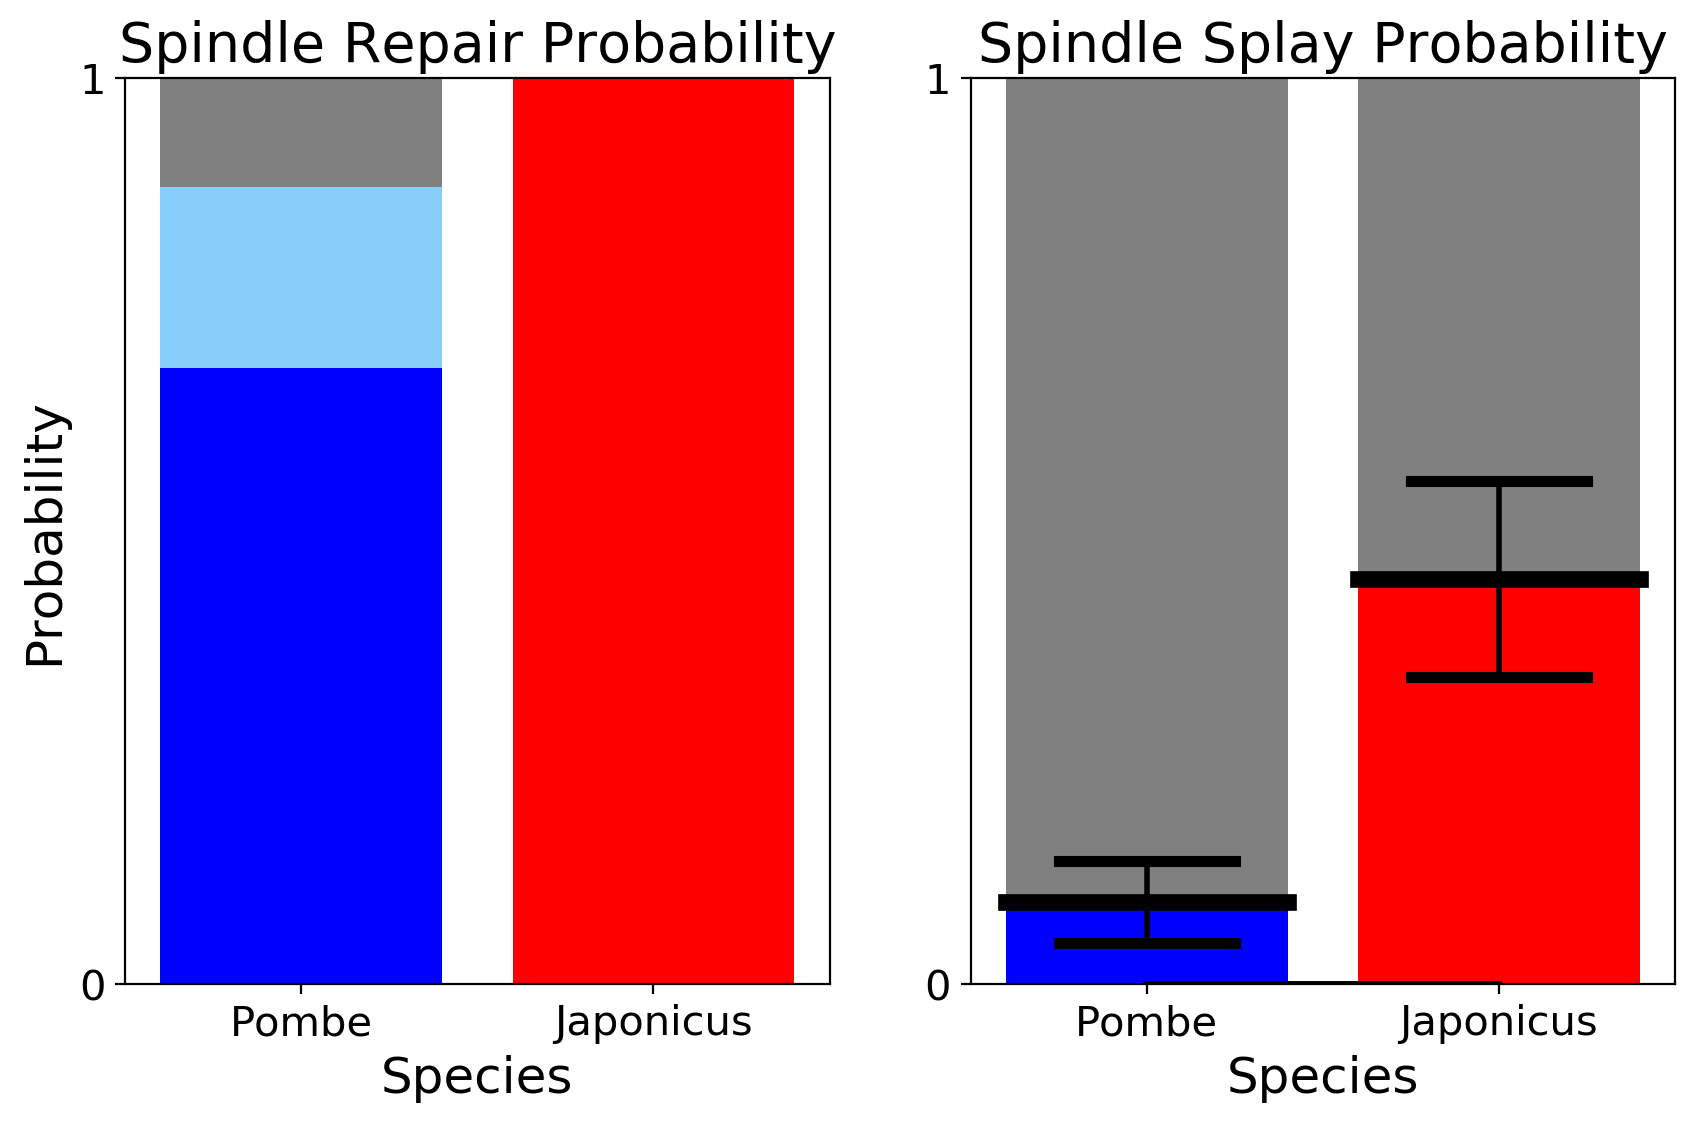

In [142]:
fig = plt.figure(dpi=200, figsize=[10,6])

fig.add_subplot(1,2,1)
plt.bar(xs, rYesNorms, color=colors)
plt.bar(xs, rXNorms, bottom=rYesNorms, color=fillColors)
plt.bar(xs, rNoNorms, bottom=rProbNorms, color='gray')
plt.xticks(xs, names, fontsize=15)
plt.yticks([0,1], fontsize=15)
plt.title('Spindle Repair Probability', fontsize=20)
plt.xlabel('Species', fontsize=18)
plt.ylabel('Probability', fontsize=18)
plt.xlim(-0.5,1.5)
plt.ylim(0,1)
#plt.savefig('1D.eps', format='eps', dpi=1000)

fig.add_subplot(1,2,2)
plt.bar(xs, sYesNorms, color=colors)
plt.bar(xs, sNoNorms, bottom=sYesNorms, color='gray')
plt.xticks(xs, names, fontsize=15)
plt.yticks([0,1], fontsize=15)
plt.title('Spindle Splay Probability', fontsize=20)
plt.xlabel('Species', fontsize=18)
#plt.ylabel('Probability', fontsize=18)
plt.xlim(-0.5,1.5)
plt.ylim(0,1)
for i in range(2):
    plt.plot([xs[i]-0.4, xs[i]+0.4], [sYesNorms[i], sYesNorms[i]], color='black', linewidth=6)
    plt.plot([xs[i]-0.25, xs[i]+0.25], [sLows[i], sLows[i]], color='black', linewidth=4)
    plt.plot([xs[i]-0.25, xs[i]+0.25], [sHighs[i], sHighs[i]], color='black', linewidth=4)
    plt.plot([xs[i], xs[i]], [sLows[i], sHighs[i]], [0,0], color='black', linewidth=2)
#plt.savefig('1D.eps', format='eps', dpi=1000)
#plt.close()

Text(0, 0.5, 'Maximum Splay Angle (degrees)')

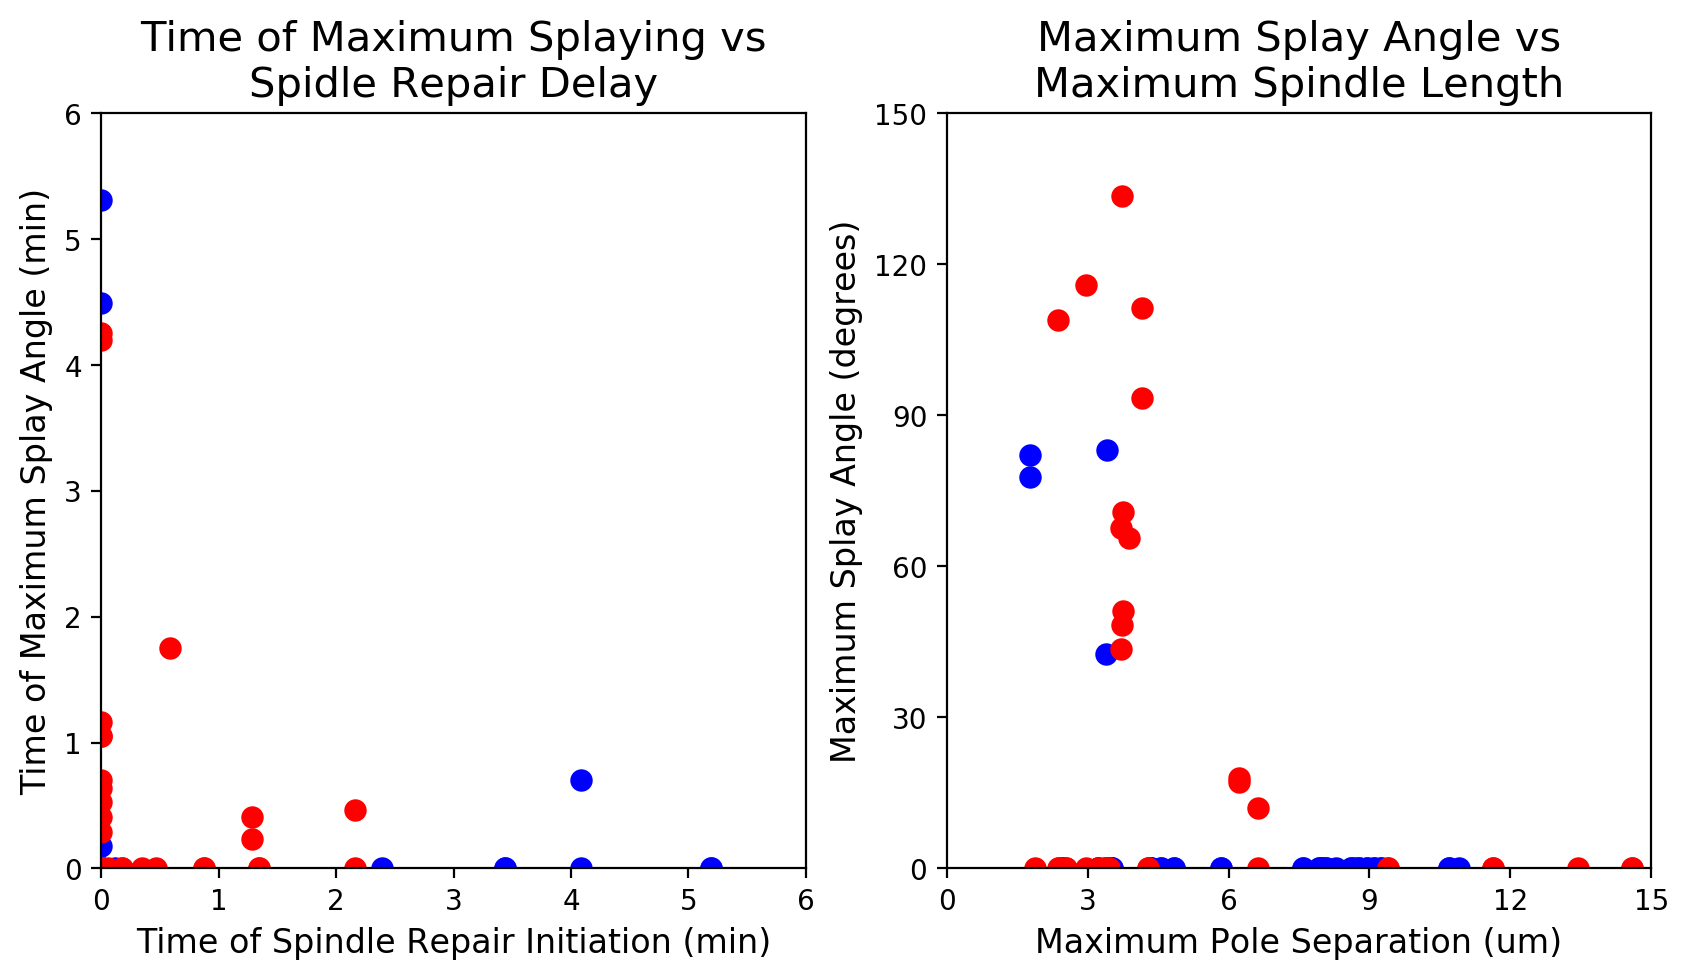

In [145]:
#fig = plt.figure(figsize=[20,9])
fig = plt.figure(dpi=200, figsize=[10,5])

fig.add_subplot(1,2,1)
#plt.figure(dpi=500, figsize=[5,5])
#plt.plot([0,2], [0,2], color='black', linewidth=2, zorder=1)
#plt.fill_between([0,2],[0,2],[0,0], color='lightgray', zorder=0)
plt.scatter(PmaxLtsRS, PmaxAtsRS, s=50, color=colors[0], zorder=2)
plt.scatter(JmaxLtsRS, JmaxAtsRS, s=50, color=colors[1], zorder=2)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks([0,1,2,3,4,5,6], fontsize=10)
plt.yticks([0,1,2,3,4,5,6], fontsize=10)
plt.title('Time of Maximum Splaying vs\nSpidle Repair Delay', fontsize=15)
plt.xlabel('Time of Spindle Repair Initiation (min)', fontsize=12)
plt.ylabel('Time of Maximum Splay Angle (min)', fontsize=12)
#plt.savefig('2A.eps', format='eps', dpi=1000)
#plt.close()

fig.add_subplot(1,2,2)
#plt.figure(dpi=500, figsize=[5,5])
#plt.plot([0,2], [0,2], color='black', linewidth=2, zorder=1)
#plt.fill_between([0,2],[0,2],[0,0], color='lightgray', zorder=0)
plt.scatter(PmaxLsRS, PmaxAsRS, s=50, color=colors[0], zorder=2)
plt.scatter(JmaxLsRS, JmaxAsRS, s=50, color=colors[1], zorder=2)
plt.xlim(0,15)
plt.ylim(0,150)
plt.xticks([0,3,6,9,12,15], fontsize=10)
plt.yticks([0,30,60,90,120,150], fontsize=10)
plt.title('Maximum Splay Angle vs\nMaximum Spindle Length', fontsize=15)
plt.xlabel('Maximum Pole Separation (um)', fontsize=12)
plt.ylabel('Maximum Splay Angle (degrees)', fontsize=12)
#plt.savefig('2A.eps', format='eps', dpi=1000)
#plt.close()

0.0037481686955916776 0.07850626877519715


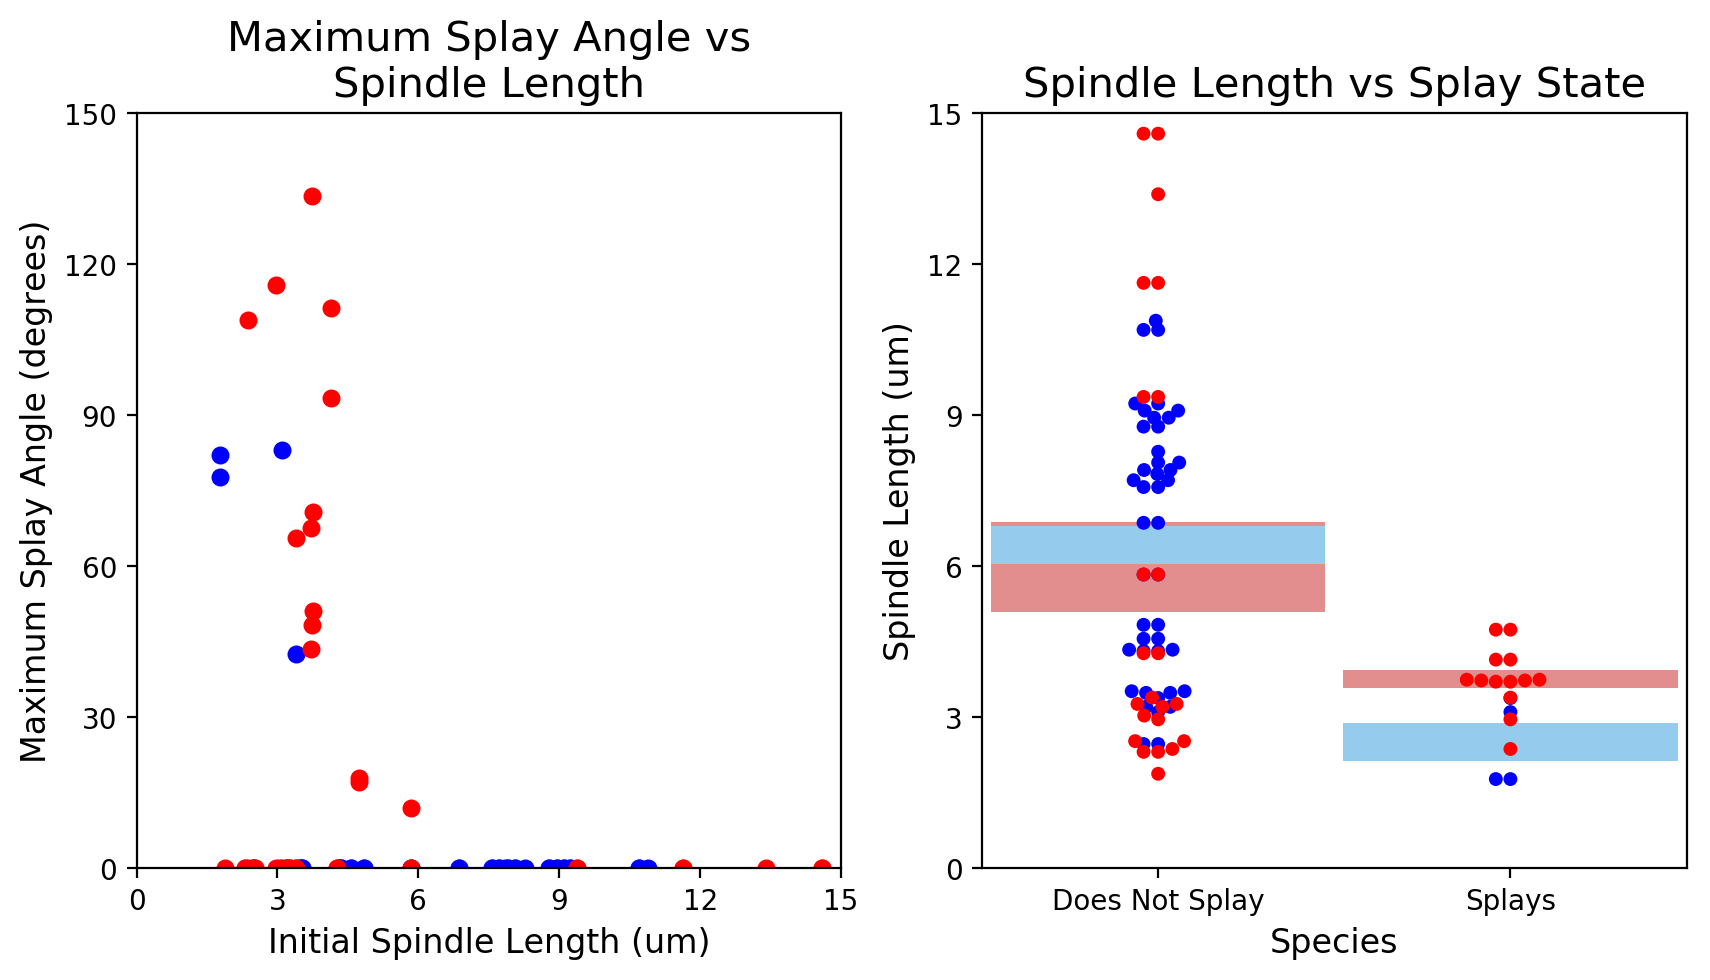

In [18]:
fig = plt.figure(dpi=200, figsize=[10,5])

fig.add_subplot(1,2,1)
#plt.figure(dpi=200, figsize=[5,5])
#plt.plot([0,2], [0,2], color='black', linewidth=2, zorder=1)
#plt.fill_between([0,2],[0,2],[0,0], color='lightgray', zorder=0)
plt.scatter(PiSpinLsRS, PmaxAsRS, s=30, color=colors[0], zorder=2)
plt.scatter(JiSpinLsRS, JmaxAsRS, s=30, color=colors[1], zorder=2)
plt.xlim(0,15)
plt.ylim(0,150)
plt.xticks([0,3,6,9,12,15], fontsize=10)
plt.yticks([0,30,60,90,120,150], fontsize=10)
plt.title('Maximum Splay Angle vs\nSpindle Length', fontsize=15)
plt.xlabel('Initial Spindle Length (um)', fontsize=12)
plt.ylabel('Maximum Splay Angle (degrees)', fontsize=12)
#plt.savefig('2A.eps', format='eps', dpi=1000)
#plt.close()

fig.add_subplot(1,2,2)
sb.swarmplot(x=PlenStypes, y=PiSpinLsRS, palette=[colors[0], colors[0]])
sb.swarmplot(x=JlenStypes, y=JiSpinLsRS, palette=[colors[1], colors[1]])
sb.boxplot(x=JlenBtypes, y=JlenError, palette=[fillColors[1], fillColors[1]], width=0.95, fliersize=0, linewidth=0)
sb.boxplot(x=PlenBtypes, y=PlenError, palette=[fillColors[0], fillColors[0]], width=0.95, fliersize=0, linewidth=0)
#sb.boxplot(x=JlenBtypes, y=JlenError, palette=[fillColors[1], fillColors[1]], width=0.95, fliersize=0, linewidth=0)
plt.title('Spindle Length vs Splay State', fontsize=15)
plt.xlabel('Species', fontsize=12)
plt.xticks(xs, ['Does Not Splay', 'Splays'], fontsize=10)
plt.ylabel('Spindle Length (um)', fontsize=12)
plt.ylim(0,15)
plt.yticks([0,3,6,9,12,15], fontsize=10)
#plt.savefig('3C.eps', format='eps', dpi=1000)
#plt.close()
print(PlenP, JlenP)

0.17973592717667305


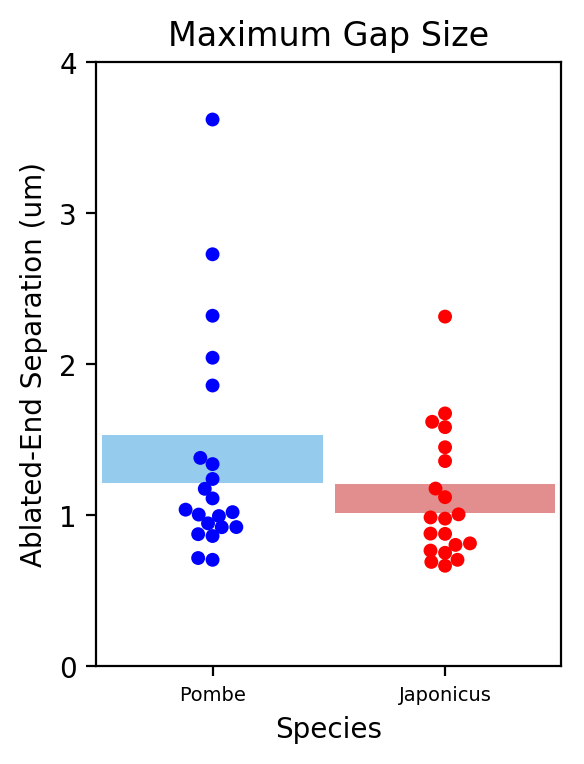

In [146]:
plt.figure(dpi=200, figsize=[3,4])
sb.swarmplot(x=gapStypes, y=gapSwarm, palette=colors)
sb.boxplot(x=gapBtypes, y=gapError, palette=fillColors, width=0.95, fliersize=0, linewidth=0)
plt.title('Maximum Gap Size')
plt.xlabel('Species')
plt.xticks(xs, names, fontsize=7)
plt.ylabel('Ablated-End Separation (um)')
plt.ylim(0,4)
plt.yticks([0,1,2,3,4])
#plt.savefig('3C.eps', format='eps', dpi=1000)
#plt.close()
print(gapP)

C:\Apps\Anaconda3\lib\site-packages\matplotlib\legend.py:1270: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


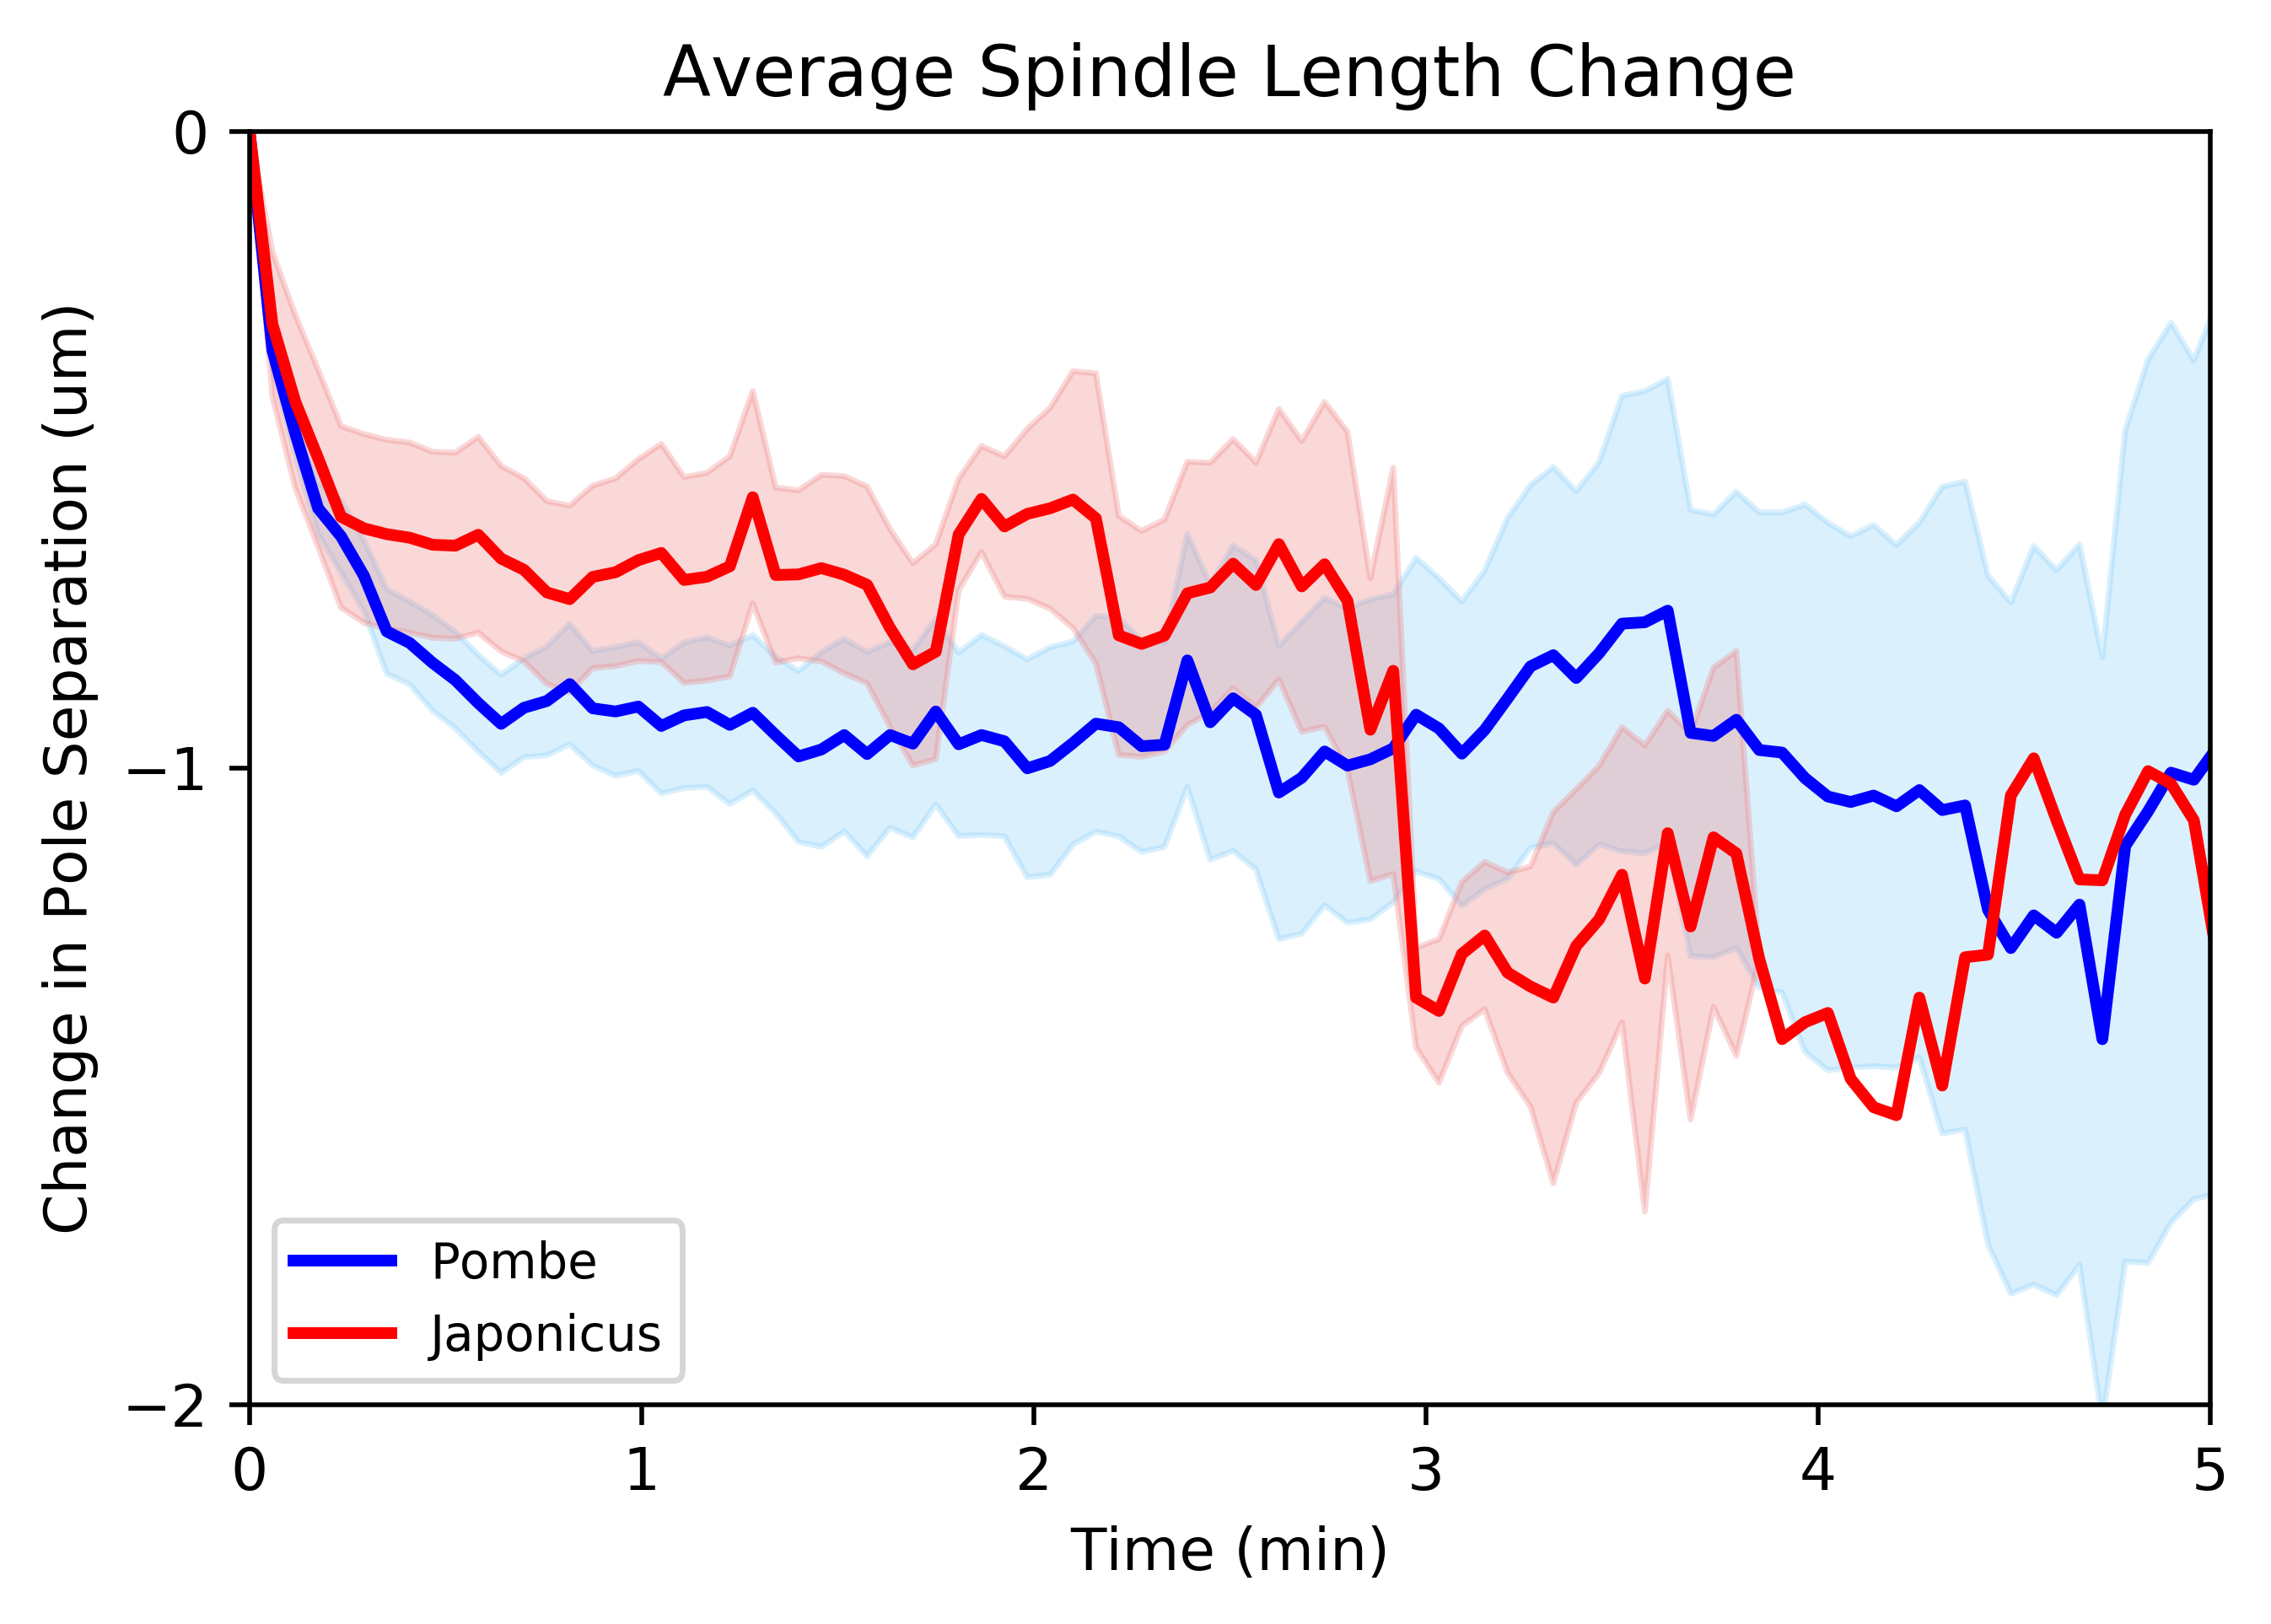

In [151]:
lines = []
plt.figure(dpi=500)
lines.append(plt.plot(PtTimesL, PtLs, color=colors[0], lw=2))
plt.fill_between(PtTimesL, PtLowLs, PtHighLs, color=fillColors[0], alpha=0.3)
lines.append(plt.plot(JtTimesL, JtLs, color=colors[1], lw=2))
plt.fill_between(JtTimesL, JtLowLs, JtHighLs, color=fillColors[1], alpha=0.3)
plt.xlim(0,5)
plt.xticks([0,1,2,3,4,5])
plt.ylim(-2,0)
plt.yticks([-2,-1,0])
plt.title('Average Spindle Length Change')
plt.xlabel('Time (min)')
plt.ylabel('Change in Pole Separation (um)')
plt.legend(lines, labels=names, loc='lower left', fontsize='small')
#plt.savefig('2F.eps', format='eps', dpi=1000)
#plt.close()

0.5572680707476604
2594 72
0.18805753265582842
953 340


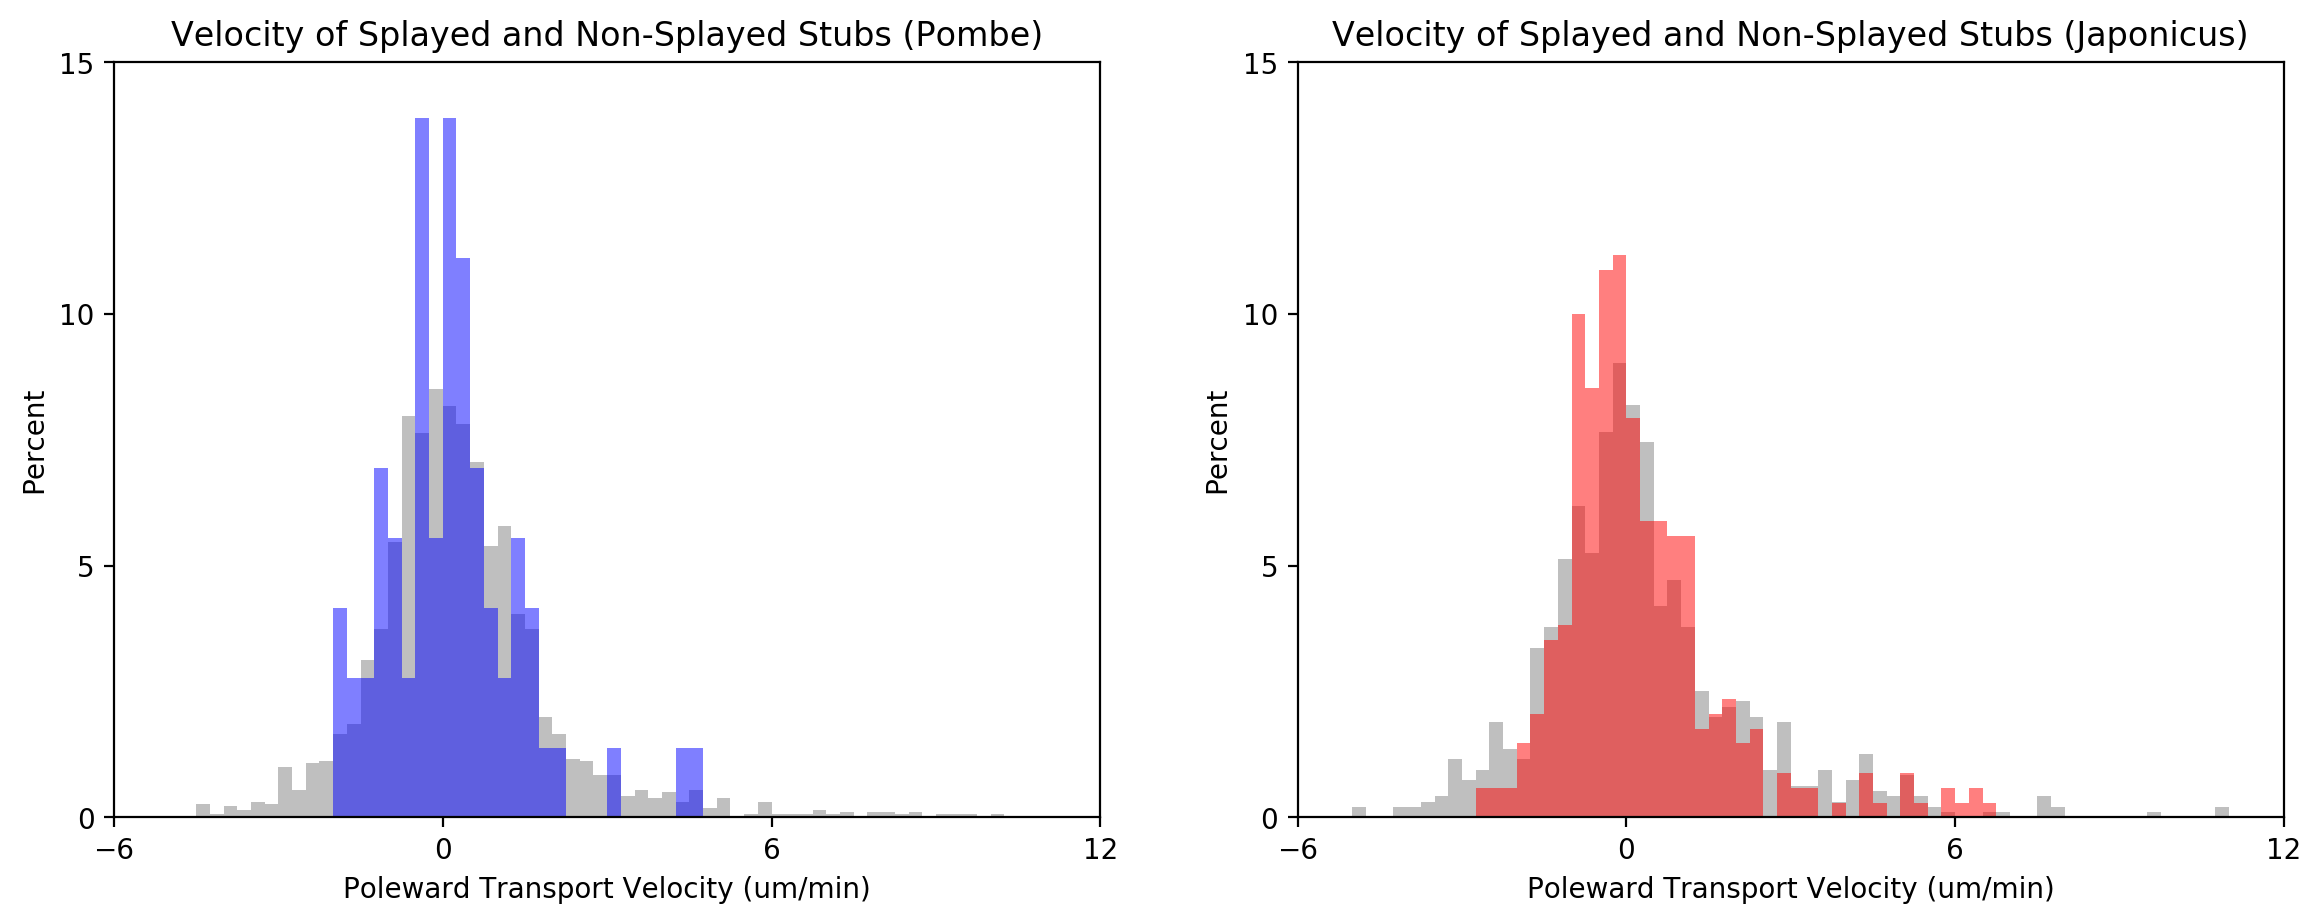

In [46]:
fig = plt.figure(dpi=200, figsize=[14,5])

fig.add_subplot(1,2,1)
plt.hist(PvsN, 80, range=(-7.5,12.5), facecolor='gray', alpha=0.5, weights=PweightsN)
plt.hist(PvsY, 80, range=(-7.5,12.5), facecolor=colors[0], alpha=0.5, weights=PweightsY)
plt.title('Velocity of Splayed and Non-Splayed Stubs (Pombe)')
plt.xlabel('Poleward Transport Velocity (um/min)')
plt.ylabel('Percent')
plt.xlim(-6,12)
plt.xticks([-6,0,6,12])
plt.ylim(0,0.15)
plt.yticks([0,0.05,0.1,0.15], [0,5,10,15])
#plt.yticks([0,0.02,0.04,0.06,0.08,0.1,0.12,0.14], [0,2,4,6,8,10,12,14])
#plt.savefig('2B.eps', format='eps', dpi=1000)
#plt.close()

fig.add_subplot(1,2,2)
plt.hist(JvsN, 80, range=(-7.5,12.5), facecolor='gray', alpha=0.5, weights=JweightsN)
plt.hist(JvsY, 80, range=(-7.5,12.5), facecolor=colors[1], alpha=0.5, weights=JweightsY)
plt.title('Velocity of Splayed and Non-Splayed Stubs (Japonicus)')
plt.xlabel('Poleward Transport Velocity (um/min)')
plt.ylabel('Percent')
plt.xlim(-6,12)
plt.xticks([-6,0,6,12])
plt.ylim(0,0.15)
plt.yticks([0,0.05,0.1,0.15], [0,5,10,15])
#plt.yticks([0,0.02,0.04,0.06,0.08,0.1,0.12,0.14], [0,2,4,6,8,10,12,14])
#plt.savefig('2B.eps', format='eps', dpi=1000)
#plt.close()

print(PpV)
print(len(PvsN), len(PvsY))
print(JpV)
print(len(JvsN), len(JvsY))

C:\Apps\Anaconda3\lib\site-packages\matplotlib\legend.py:1270: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


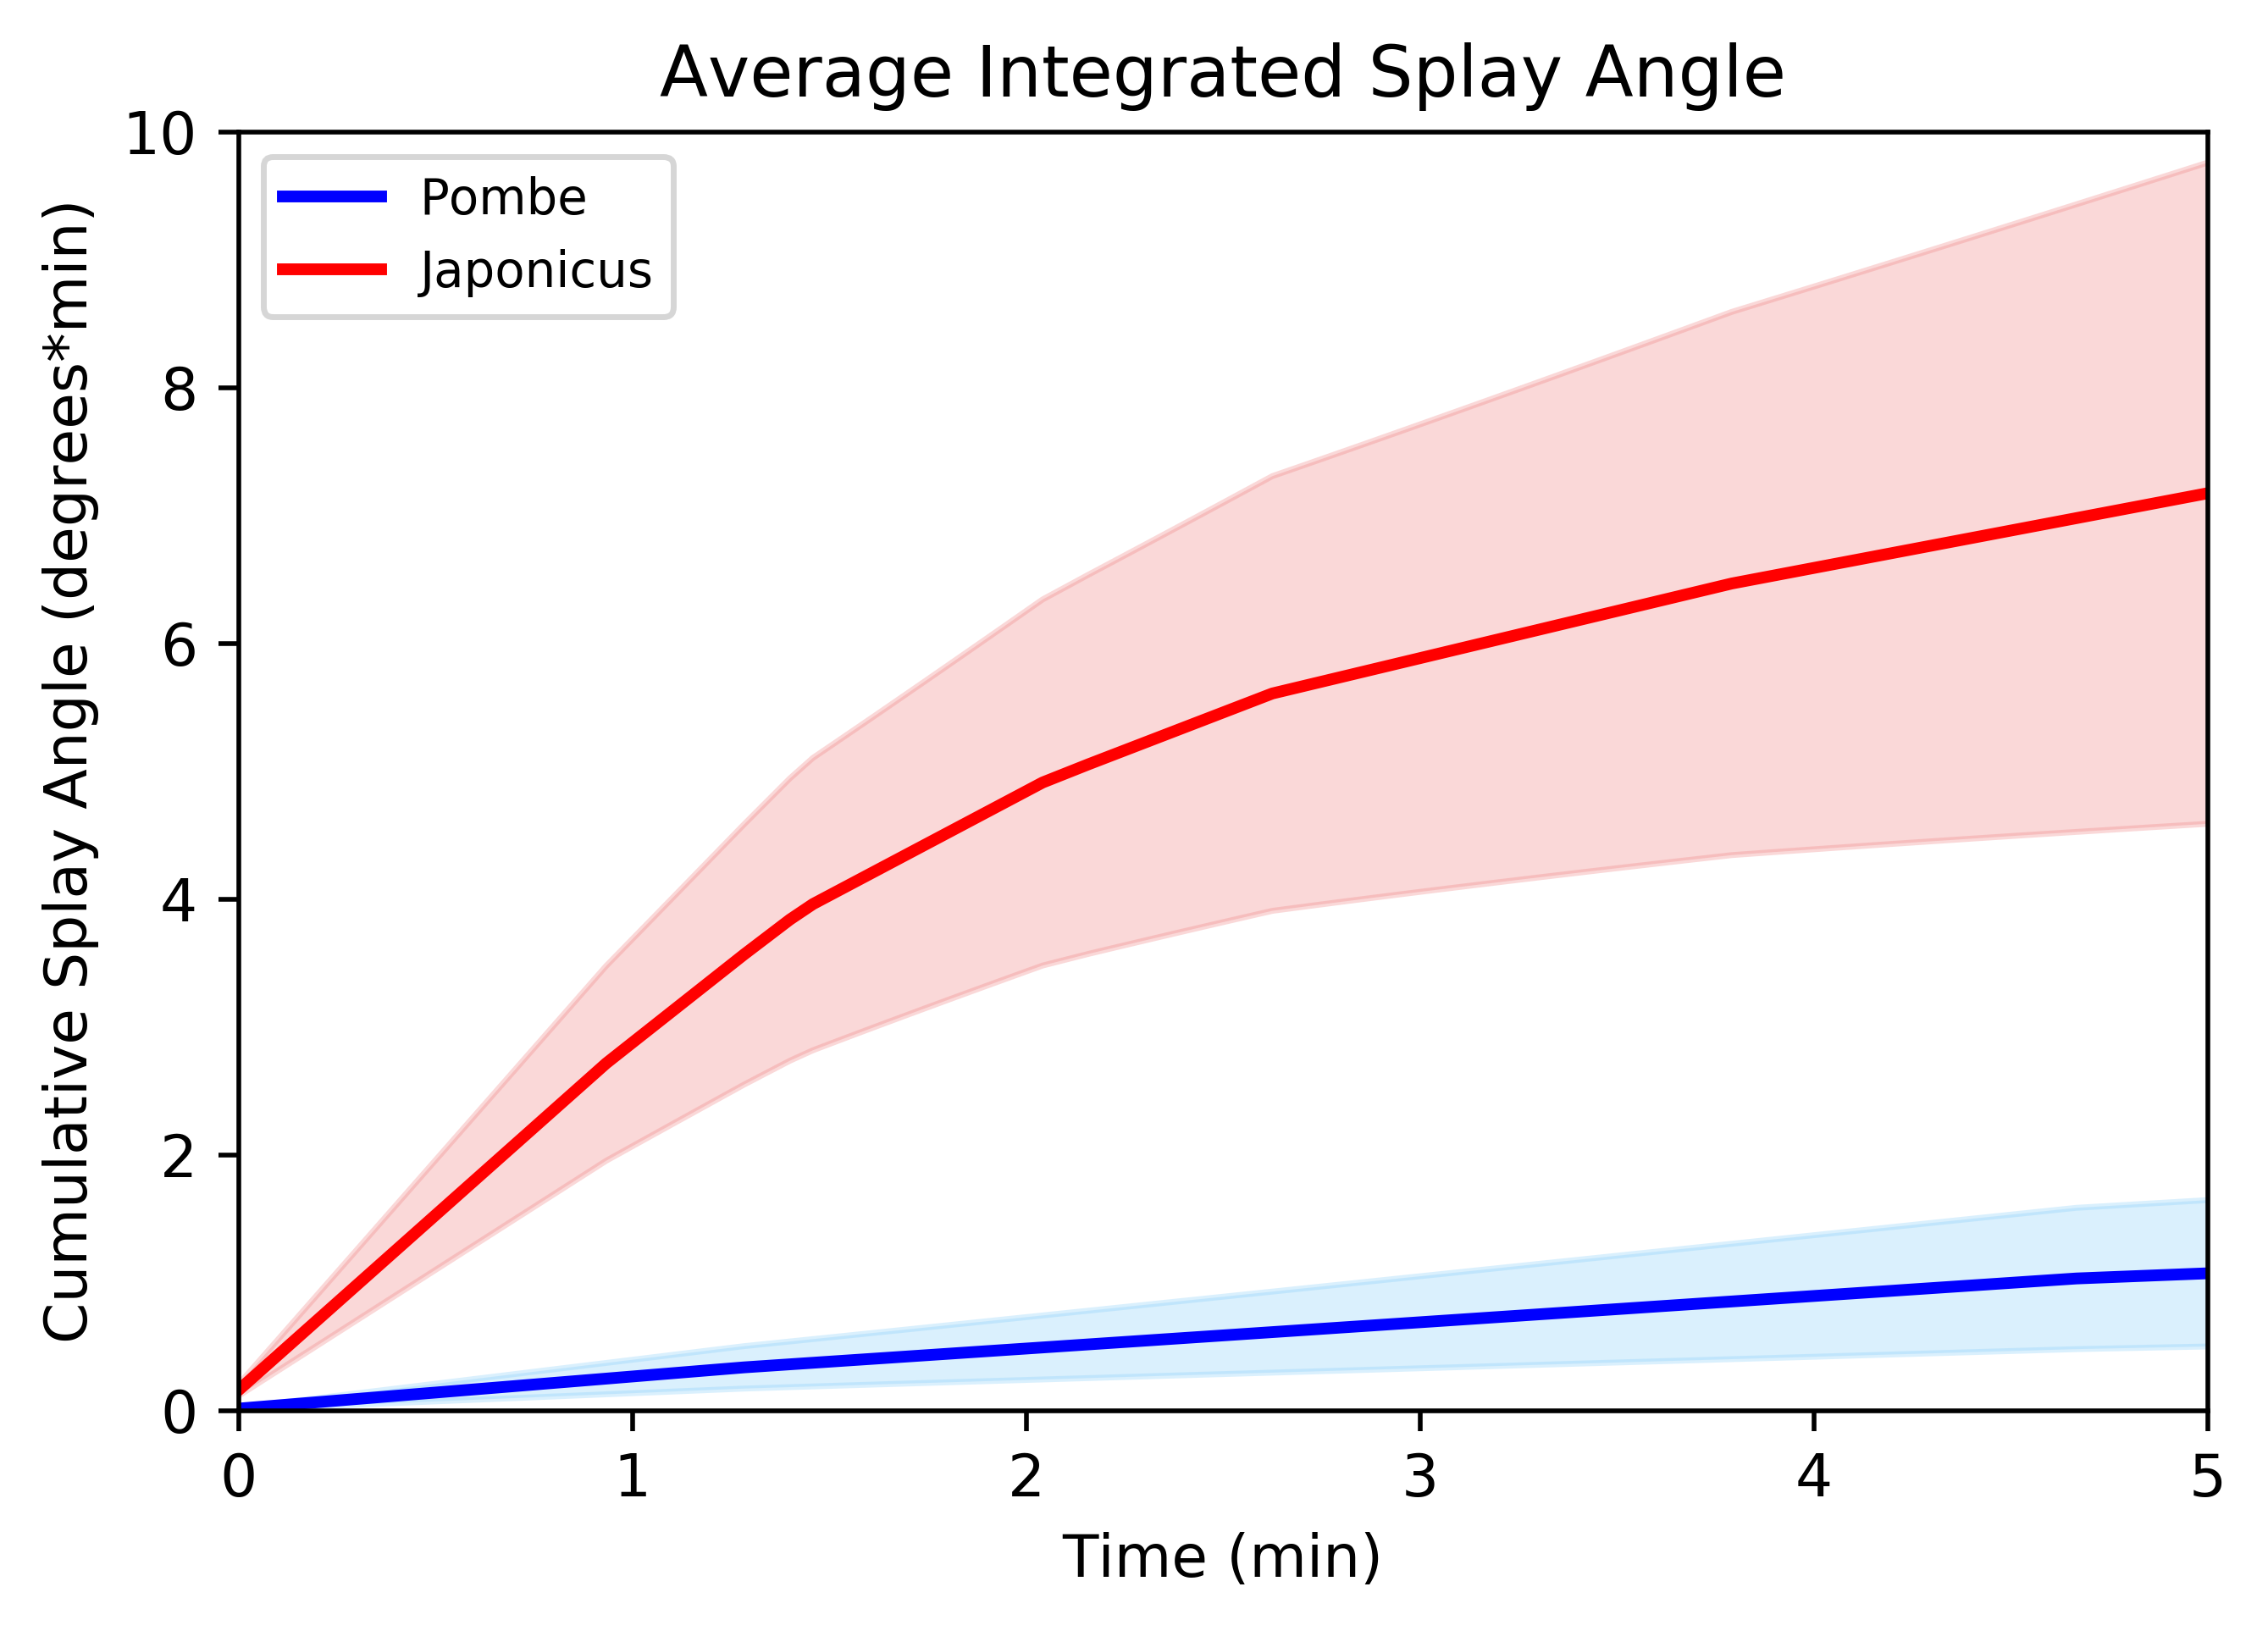

In [149]:
lines = []
plt.figure(dpi=500)
lines.append(plt.plot(PtAvgTimesA, PtAvgInts, color=colors[0], lw=2))
plt.fill_between(PtAvgTimesA, PtLowInts, PtHighInts, color=fillColors[0], alpha=0.3)
lines.append(plt.plot(JtAvgTimesA, JtAvgInts, color=colors[1], lw=2))
plt.fill_between(JtAvgTimesA, JtLowInts, JtHighInts, color=fillColors[1], alpha=0.3)
plt.xlim(0,5)
plt.xticks([0,1,2,3,4,5])
plt.ylim(0,10)
plt.yticks([0,2,4,6,8,10])
plt.title('Average Integrated Splay Angle')
plt.xlabel('Time (min)')
plt.ylabel('Cumulative Splay Angle (degrees*min)')
plt.legend(lines, labels=names, loc='upper left', fontsize='small')
#plt.savefig('2F.eps', format='eps', dpi=1000)
#plt.close()

C:\Apps\Anaconda3\lib\site-packages\matplotlib\legend.py:1270: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "
C:\Apps\Anaconda3\lib\site-packages\matplotlib\legend.py:1270: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


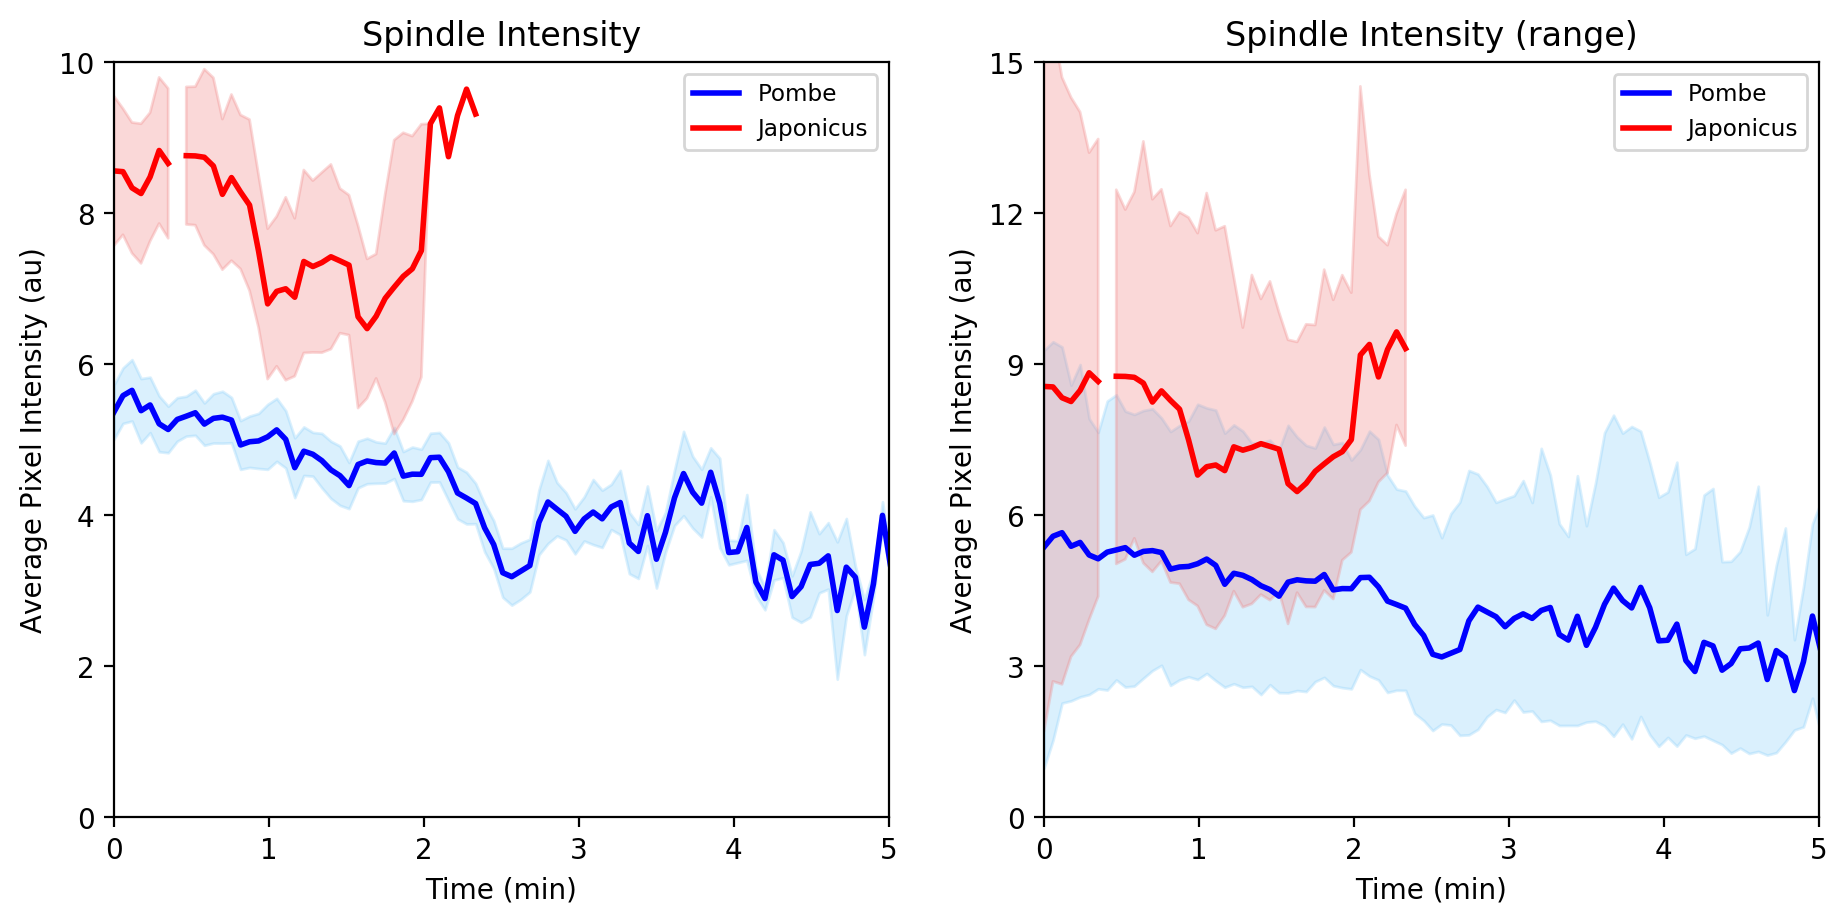

In [150]:
fig = plt.figure(dpi=200, figsize=[11,5])

lines = []
fig.add_subplot(1,2,1)
lines.append(plt.plot(PtTimesAvgIg, PtAvgIsG, color=colors[0], lw=2))
plt.fill_between(PtTimesAvgIg, PtLowAvgIsG, PtHighAvgIsG, color=fillColors[0], alpha=0.3)
lines.append(plt.plot(JtTimesAvgIg, JtAvgIsG, color=colors[1], lw=2))
plt.fill_between(JtTimesAvgIg, JtLowAvgIsG, JtHighAvgIsG, color=fillColors[1], alpha=0.3)
plt.xlim(0,5)
plt.xticks([0,1,2,3,4,5])
plt.ylim(0,10)
plt.yticks([0,2,4,6,8,10])
plt.title('Spindle Intensity')
plt.xlabel('Time (min)')
plt.ylabel('Average Pixel Intensity (au)')
plt.legend(lines, labels=names, loc='upper right', fontsize='small')
#plt.savefig('2F.eps', format='eps', dpi=1000)
#plt.close()

lines = []
fig.add_subplot(1,2,2)
lines.append(plt.plot(PtTimesAvgIg, PtAvgIsG, color=colors[0], lw=2))
plt.fill_between(PtTimesAvgIg, PtMinIsG, PtMaxIsG, color=fillColors[0], alpha=0.3)
lines.append(plt.plot(JtTimesAvgIg, JtAvgIsG, color=colors[1], lw=2))
plt.fill_between(JtTimesAvgIg, JtMinIsG, JtMaxIsG, color=fillColors[1], alpha=0.3)
plt.xlim(0,5)
plt.xticks([0,1,2,3,4,5])
plt.ylim(0,15)
plt.yticks([0,3,6,9,12,15])
plt.title('Spindle Intensity (range)')
plt.xlabel('Time (min)')
plt.ylabel('Average Pixel Intensity (au)')
plt.legend(lines, labels=names, loc='upper right', fontsize='small')
#plt.savefig('2F.eps', format='eps', dpi=1000)
#plt.close()